# Megaline Telecom Statistical Data Analysis

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns



## Load data

In [2]:
# Load the data files into different DataFrames
calls_data = pd.read_csv('/datasets/megaline_calls.csv')
plans_data = pd.read_csv('/datasets/megaline_plans.csv')
users_data = pd.read_csv('/datasets/megaline_users1.csv')
internet_data = pd.read_csv('/datasets/megaline_internet.csv')
messages_data = pd.read_csv('/datasets/megaline_messages.csv')


## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

print("Plans Data Info")
print(plans_data.info())

print("Plans Data:")
plans_data.head()



Plans Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
Plans Data:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [4]:
# Print a sample of data for plans

plans_data.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


### Observations

- Missing Data:

    - No missing data is observed; all columns have 2 non-null entries.

- Data Structure:

    - There are 2 entries (rows) in the DataFrame, which correspond to the two plans offered by Megaline: Surf and Ultimate.

- Sample Data:

    - The sample data confirms the correct representation of the two plans with their respective pricing and usage limits.
    
- Data Consistency:

    - Ensure the consistency of units. For example, mb_per_month_included is in megabytes, whereas usd_per_gb is in gigabytes. While this might not be an issue, it's important to handle the unit conversion correctly during analysis.
    
    
### No Major Issues Observed

<p>Given the observations, there are no major issues with the plans DataFrame. The data types are appropriate, and there are no missing values. The data sample shows the expected plan details accurately.<p>

## Fix data

None Needed


## Enrich data

None Needed

## Users

In [5]:
# Print the general/summary information about the users' DataFrame

print("Users Data Info")
print(users_data.info())

print("Users Data:")
users_data.head()

Users Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
Users Data:


,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [6]:
# Print a sample of data for users

users_data.sample(5)

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
450,1450,Errol,Marquez,67,"Bakersfield, CA MSA",2018-06-16,ultimate,NaN
383,1383,Margarito,Mccoy,52,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-10-10,ultimate,NaN
484,1484,Delpha,Baldwin,46,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
153,1153,Kathaleen,Crawford,30,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-19,surf,NaN
234,1234,Matt,Taylor,19,"Seattle-Tacoma-Bellevue, WA MSA",2018-09-12,ultimate,NaN


### Observations

- Missing Data:

    - The churn_date column has many missing values (466 out of 500 entries are NaT), which indicates that most users are still active.

- Data Structure:

    - There are 500 entries (rows) in the DataFrame, corresponding to the 500 Megaline clients.

- Sample Data:

    - The sample data shows a variety of users with different names, ages, cities, registration dates, and plans. Some users have churned (have a churn_date), while others are still active (no churn_date).
    
    
### Potential Issues

- Missing Data:

    - The churn_date column has many missing values. This is expected since only users who have churned will have a churn_date. We can handle these missing values appropriately in our analysis, for example, by filling missing churn_date values with a specific marker or leaving them as NaN.

- Data Consistency:

    - Check for any inconsistencies in categorical data such as `city`. Ensure there are no typos or inconsistent entries. Also need to change `tariff` to `plan`.

### Fix Data

In [7]:
# Fill missing churn_date with a specific marker if necessary, for example, 'Still Active'
users_data['churn_date'].fillna('Still Active', inplace=True)

# Check for unique values in categorical columns
print(users_data['city'].unique())


['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

### Enrich Data

In [8]:
# Convert reg_date and churn_date to datetime
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'])
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], errors='coerce')

# created a month column
users_data['month'] = users_data.reg_date.dt.month

# change name from tarrif to plan
users_data.rename(columns={'tariff': 'plan'}, inplace=True)


## Calls

In [9]:
# Print the general/summary information about the calls' DataFrame

print("Calls Data Info")
print(calls_data.info())

print("Calls Data:")
calls_data.head()

Calls Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
Calls Data:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [10]:
# Print a sample of data for calls

calls_data.sample(5)


,id,user_id,call_date,duration
127951,1459_95,1459,2018-12-14,0.65
20326,1077_293,1077,2018-12-09,18.67
91339,1329_146,1329,2018-09-09,0.00
130616,1470_65,1470,2018-05-30,17.58
85195,1313_175,1313,2018-11-15,17.06


### Observations

- Missing Data:

    - No missing data is observed; all columns have 137735 non-null entries.

- Data Structure:

    - There are 137735 entries (rows) in the DataFrame, corresponding to individual call records.

- Sample Data:

    - The sample data shows various call durations, dates, and user IDs. Notably, some calls have a duration of 0.0, indicating either missed calls or calls that did not connect.
    
    
### Potential Issues

- Data Types Issues:

    - The call_date column is currently an object. It should be converted to datetime64[ns] for proper date manipulation and analysis.

- Missing Data:

    - There are no missing data issues based on the info() output.

- Data Consistency:

    - Check for any inconsistencies in call duration, such as negative values (which should not exist).

- Calls Duration:

    - Calls with a duration of 0.0 need to be understood in context. If these are valid records (e.g., missed calls), they should be retained. Otherwise, consider filtering them out.

### Fix data

In [11]:
# Convert call_date to datetime
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'])



### Enrich data

In [12]:
# Check for negative durations
negative_durations = calls_data[calls_data['duration'] < 0]
print("Negative durations:\n", negative_durations)

# Check for zero duration calls
zero_duration_calls = calls_data[calls_data['duration'] == 0]
print("Zero duration calls:\n", zero_duration_calls)

Negative durations:
 Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []
Zero duration calls:
               id  user_id  call_date  duration
19        1001_4     1001 2018-12-05       0.0
25       1001_13     1001 2018-12-24       0.0
31       1001_30     1001 2018-10-17       0.0
32       1001_31     1001 2018-11-03       0.0
34       1001_35     1001 2018-12-21       0.0
...          ...      ...        ...       ...
137714  1499_183     1499 2018-11-10       0.0
137715  1499_184     1499 2018-09-15       0.0
137720  1499_189     1499 2018-12-27       0.0
137722  1499_191     1499 2018-12-24       0.0
137725  1499_194     1499 2018-10-31       0.0

[26834 rows x 4 columns]


## Messages

In [13]:
# Print the general/summary information about the messages' DataFrame

print("Messages Data Info")
print(messages_data.info())

print("Messages Data:")
messages_data.head()


Messages Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
Messages Data:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [14]:
# Print a sample of data for messages

messages_data.sample(5)


,id,user_id,message_date
58831,1374_5,1374,2018-10-09
46708,1318_94,1318,2018-10-09
29255,1179_51,1179,2018-12-18
12589,1082_131,1082,2018-10-13
30861,1194_20,1194,2018-10-14


### Observations

- Missing Data:

    - No missing data is observed; all columns have 76051 non-null entries.

- Data Structure:

    - There are 76051 entries (rows) in the DataFrame, corresponding to individual text message records.

- Sample Data:

    - The sample data shows various message dates and user IDs, indicating when each message was sent and by which user.
    
    
### Potential Issues

- Data Types:

    - The message_date column is currently an object. It should be converted to datetime64[ns] for proper date manipulation and analysis.


### Fix data

In [15]:
# Convert message_date to datetime
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'])


### Enrich data

None Needed

## Internet

In [16]:
# Print the general/summary information about the internet DataFrame

print("Internet Data Info")
print(internet_data.info())

print("Internet Data:")
internet_data.head()

Internet Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
Internet Data:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [17]:
# Print a sample of data for the internet traffic

internet_data.sample(5)


,id,user_id,session_date,mb_used
18004,1081_63,1081,2018-07-18,96.95
97785,1460_475,1460,2018-09-09,420.38
49052,1220_56,1220,2018-12-14,458.45
20631,1095_322,1095,2018-12-03,0.00
75703,1356_151,1356,2018-12-14,343.34


### Observations

- Missing Data:

    - No missing data is observed; all columns have 104825 non-null entries.

- Data Structure:

    - There are 104825 entries (rows) in the DataFrame, corresponding to individual internet session records.

- Sample Data:

    - The sample data shows various amounts of data usage, dates of sessions, and user IDs.
    
### Potential Issues

- Data Types:

    - The session_date column is currently an object. It should be converted to datetime64[ns] for proper date manipulation and analysis.

### Fix data

In [18]:
# Convert session_date to datetime
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'])


### Enrich data

None Needed

## Study plan conditions

In [19]:
# Print out the plan conditions and make sure they are clear for you

plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Plan Details and Conditions
### Surf Plan:

- Monthly charge: $20
    - Included:
        - 500 minutes
        - 50 text messages
        - 15 GB of data (15360 MB)

    - Overage charges:
        - Per minute: $0.03 
        - Per text message: $0.03
        - Per GB of data: $10

### Ultimate Plan:

- Monthly charge: $70
    - Included:
        - 3000 minutes
        - 1000 text messages
        - 30 GB of data (30720 MB)

    - Overage charges:
        - Per minute: $0.01
        - Per text message: $0.01
        - Per GB of data: $7

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [20]:
# Calculate the number of calls made by each user per month. Save the result.

# Extract month and year from call_date
calls_data['month'] = calls_data['call_date'].dt.to_period('M')

# Calculate the number of calls made by each user per month
calls_per_month = calls_data.groupby(['user_id', 'month']).size().reset_index(name='calls_made')

# Display the result
calls_per_month.head()

,user_id,month,calls_made
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [21]:
# Calculate the amount of minutes spent by each user per month. Save the result.

# Round up the duration of each call
calls_data['rounded_duration'] = np.ceil(calls_data['duration'])

monthly_calls = calls_data.groupby(['user_id', 'month'])['rounded_duration'].sum().reset_index()

# Display the result
monthly_calls.head()

,user_id,month,rounded_duration
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0


In [22]:
# Calculate the number of messages sent by each user per month. Save the result.

# Extract month and year from session_date
messages_data['month'] = messages_data['message_date'].dt.to_period('M')


monthly_messages = messages_data.groupby(['user_id', 'month'])['id'].count().reset_index().rename(columns={'id': 'messages'})

monthly_messages

,user_id,month,messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [23]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

# Extract month and year from session_date
internet_data['month'] = internet_data['session_date'].dt.to_period('M')

# Calculate the volume of internet traffic used by each user per month
monthly_internet = internet_data.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Display the result
monthly_internet

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


In [24]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
# Merge the calculated data
users_data = users_data.rename(columns={'user_id': 'user_id'})
monthly_usage = calls_per_month.merge(monthly_calls, on=['user_id', 'month'], how='outer').merge(monthly_messages, on=['user_id', 'month'], how='outer').merge(monthly_internet, on=['user_id', 'month'], how='outer')
monthly_usage = monthly_usage.merge(users_data[['user_id', 'plan']], on='user_id', how='left')

# Fill missing values with 0
monthly_usage = monthly_usage.fillna({'duration': 0, 'messages': 0, 'mb_used': 0})

# Display the combined user data
monthly_usage.head()

,user_id,month,calls_made,rounded_duration,messages,mb_used,plan
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf
3,1001,2018-10,65.0,393.0,53.0,22330.49,surf
4,1001,2018-11,64.0,426.0,36.0,18504.30,surf


In [25]:
# Add the plan information

monthly_usage = monthly_usage.merge(plans_data, left_on='plan', right_on='plan_name', how='left')

monthly_usage.head()

# list(monthly_usage.columns)


,user_id,month,calls_made,rounded_duration,messages,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf
3,1001,2018-10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf
4,1001,2018-11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf


In [26]:
# Calculate the monthly revenue for each user
monthly_usage['calls_revenue'] = (monthly_usage['rounded_duration'] - monthly_usage['minutes_included']).clip(lower=0) * monthly_usage['usd_per_minute']
monthly_usage['messages_revenue'] = (monthly_usage['messages'] - monthly_usage['messages_included']).clip(lower=0) * monthly_usage['usd_per_message']

# Round up the number of MB used per month to the nearest GB
monthly_usage['gb_used'] = np.ceil(monthly_usage['mb_used'] / 1024)

# Calculate internet revenue based on the rounded GB
monthly_usage['internet_revenue'] = (monthly_usage['gb_used'] - monthly_usage['mb_per_month_included'] / 1024).clip(lower=0) * monthly_usage['usd_per_gb']


# monthly_usage['internet_revenue'] = (monthly_usage['mb_used'] / 1024 - monthly_usage['mb_per_month_included'] / 1024).clip(lower=0) * monthly_usage['usd_per_gb']
monthly_usage['total_revenue'] = monthly_usage['usd_monthly_pay'] + monthly_usage['calls_revenue'] + monthly_usage['messages_revenue'] + monthly_usage['internet_revenue']

monthly_usage.head()

,user_id,month,calls_made,rounded_duration,messages,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,calls_revenue,messages_revenue,gb_used,internet_revenue,total_revenue
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.00,2.0,0.0,70.00
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,7.0,0.0,20.00
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,14.0,0.0,20.00
3,1001,2018-10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.09,22.0,70.0,90.09
4,1001,2018-11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.00,19.0,40.0,60.00


In [27]:
monthly_df = monthly_usage[['user_id', 'month', 'total_revenue']]

monthly_revenue = monthly_df.groupby(['user_id', 'month'])['total_revenue'].sum().reset_index()

monthly_revenue

,user_id,month,total_revenue
0,1000,2018-12,70.00
1,1001,2018-08,20.00
2,1001,2018-09,20.00
3,1001,2018-10,90.09
4,1001,2018-11,60.00
...,...,...,...
2288,1498,2018-12,100.00
2289,1499,2018-09,20.00
2290,1499,2018-10,70.00
2291,1499,2018-11,40.00


## Study user behaviour

### Calls

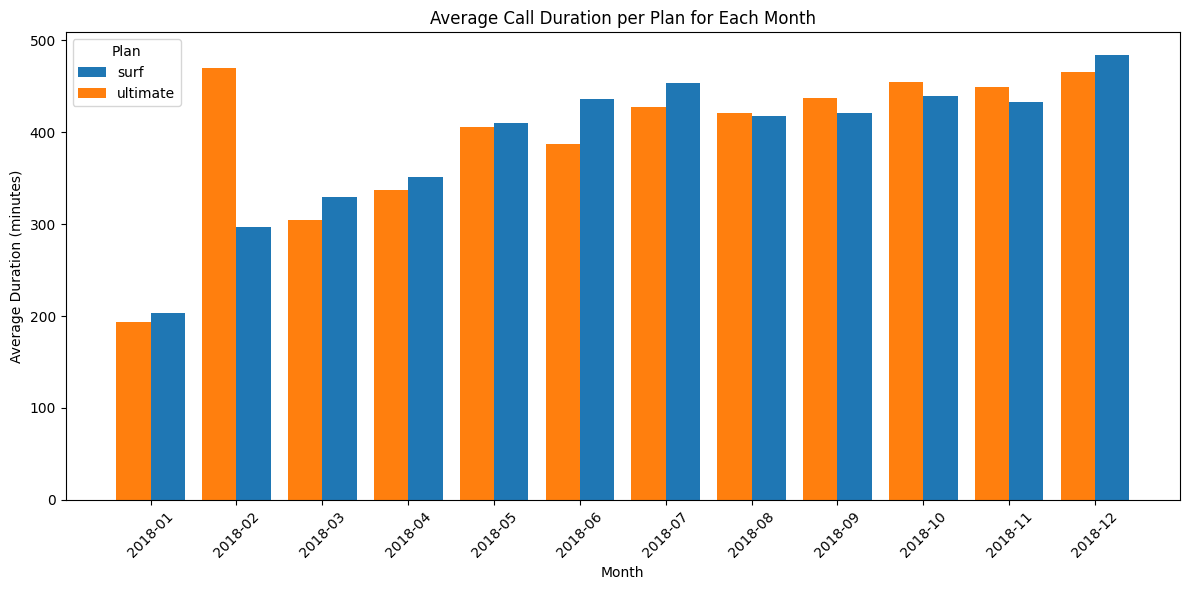

In [28]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
df = monthly_usage

# Calculate the average duration of calls per plan for each month

avg_duration_per_plan = df.groupby(['plan', 'month'])['rounded_duration'].mean().reset_index()

# Convert 'month' to string for concatenation
avg_duration_per_plan['month'] = avg_duration_per_plan['month'].astype(str)

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))

# Define the positions for the bars
months = avg_duration_per_plan['month'].unique()
n_months = len(months)
bar_width = 0.4
index = np.arange(n_months)

# Plot bars for each plan
for plan in avg_duration_per_plan['plan'].unique():
    plan_data = avg_duration_per_plan[avg_duration_per_plan['plan'] == plan]
    plt.bar(index + (0.5 if plan == 'surf' else -0.5) * bar_width, 
            plan_data['rounded_duration'], 
            bar_width, 
            label=plan)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Call Duration per Plan for Each Month')
plt.xticks(index, months, rotation=45)
plt.legend(title='Plan')
plt.tight_layout()

# Display the plot
plt.show()

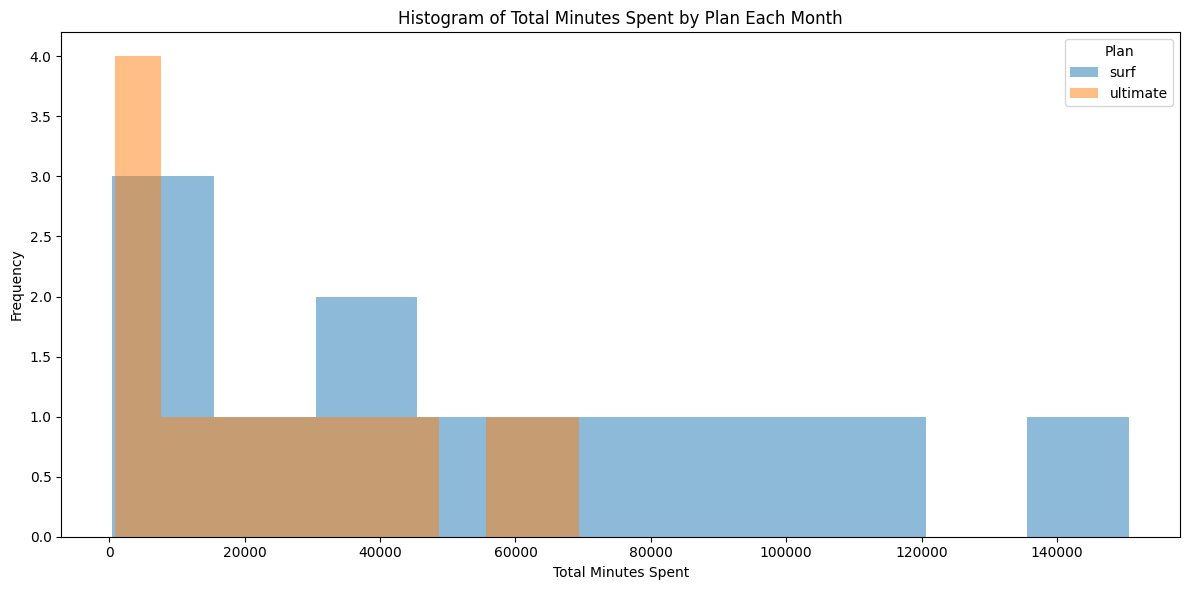

In [29]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Aggregate total minutes by plan and month
minutes_per_plan_per_month = df.groupby(['month', 'plan'])['rounded_duration'].sum().reset_index()

# Plot histograms
plt.figure(figsize=(12, 6))

# Plot histogram for each plan
for plan in minutes_per_plan_per_month['plan'].unique():
    plan_data = minutes_per_plan_per_month[minutes_per_plan_per_month['plan'] == plan]
    plt.hist(plan_data['rounded_duration'], bins=10, alpha=0.5, label=plan)

plt.xlabel('Total Minutes Spent')
plt.ylabel('Frequency')
plt.title('Histogram of Total Minutes Spent by Plan Each Month')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

In [30]:
# Calculate the mean and the variance of the monthly call duration

# Calculate the mean and variance of the monthly call duration for each plan
monthly_stats = df.groupby(['plan', 'month'])['rounded_duration'].agg(['mean', 'var']).reset_index()

# Rename columns for clarity
monthly_stats.rename(columns={'mean': 'mean_duration', 'var': 'variance_duration'}, inplace=True)


monthly_stats

,plan,month,mean_duration,variance_duration
0,surf,2018-01,203.000000,15842.000000
1,surf,2018-02,297.000000,52226.500000
2,surf,2018-03,330.000000,35809.363636
3,surf,2018-04,351.540000,50866.743265
4,surf,2018-05,410.240000,56938.779459
5,surf,2018-06,435.791667,44094.061404
6,surf,2018-07,453.733333,59802.012325
7,surf,2018-08,417.849057,52122.749224
8,surf,2018-09,420.732984,44579.912538
9,surf,2018-10,438.991379,49326.952306


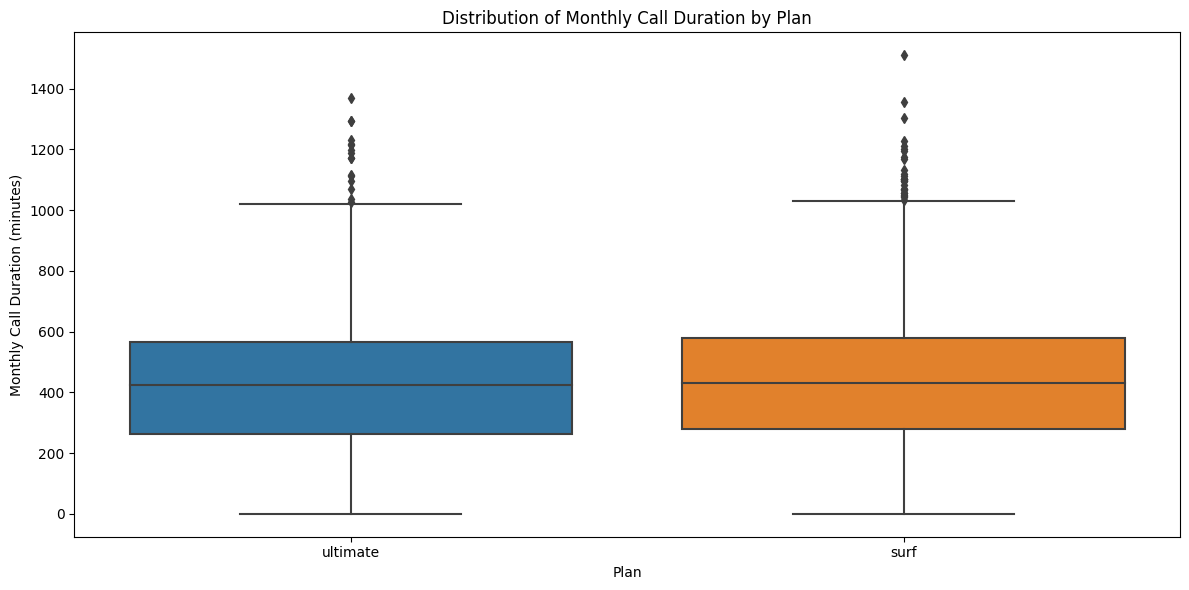

In [31]:
# Plot a boxplot to visualize the distribution of the monthly call duration

plt.figure(figsize=(12, 6))
sns.boxplot(x='plan', y='rounded_duration', data=df)

plt.xlabel('Plan')
plt.ylabel('Monthly Call Duration (minutes)')
plt.title('Distribution of Monthly Call Duration by Plan')
plt.tight_layout()
plt.show()

### Analysis

#### Surf vs. Ultimate:

- Mean Duration:
    - Ultimate plan shows a higher mean duration compared to the Surf plan in several months, notably in February and March.
    - Both plans exhibit an increasing trend in call duration over the year, indicating more usage or longer calls as the year progresses.
- Variance:
    - Variance is higher in the Ultimate plan in some months, indicating more inconsistency in call durations compared to the Surf plan.
    - Both plans exhibit high variances, reflecting diverse user behaviors and call patterns.


### Messages

In [32]:
# Compare the number of messages users of each plan tend to send each month

# Convert 'month' to string
df['month'] = df['month'].astype(str)

# Calculate total number of messages by plan
messages_per_plan = df.groupby('plan')['messages'].sum().reset_index()

# Calculate total number of messages by plan and month
messages_per_plan_per_month = df.groupby(['month', 'plan'])['messages'].sum().reset_index()

# Display results
print("Total messages per plan:")
print(messages_per_plan)

print("\nTotal messages per plan and month:")
messages_per_plan_per_month

Total messages per plan:
       plan  messages
0      surf   49014.0
1  ultimate   27037.0

Total messages per plan and month:


,month,plan,messages
0,2018-01,surf,21.0
1,2018-01,ultimate,62.0
2,2018-02,surf,108.0
3,2018-02,ultimate,151.0
4,2018-03,surf,351.0
5,2018-03,ultimate,243.0
6,2018-04,surf,870.0
7,2018-04,ultimate,463.0
8,2018-05,surf,1849.0
9,2018-05,ultimate,931.0


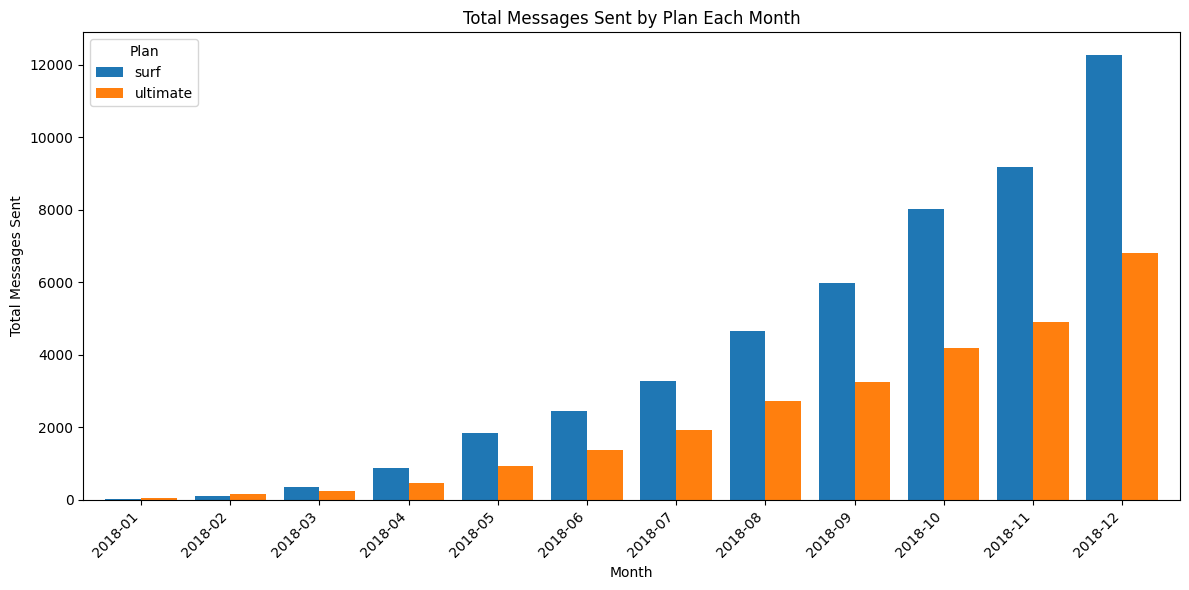

In [33]:
# Pivot the data for side-by-side bar plotting
pivot_data = messages_per_plan_per_month.pivot(index='month', columns='plan', values='messages').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot side-by-side bars for each month
pivot_data.plot(kind='bar', ax=ax, width=0.8)  # width controls the space between bars

# Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Total Messages Sent')
ax.set_title('Total Messages Sent by Plan Each Month')
ax.legend(title='Plan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
# Compare the amount of internet traffic consumed by users per plan
internet_traffic_per_plan = df.groupby('plan')['mb_used'].sum().reset_index()

internet_traffic_per_plan

,plan,mb_used
0,surf,26046179.93
1,ultimate,12394583.78


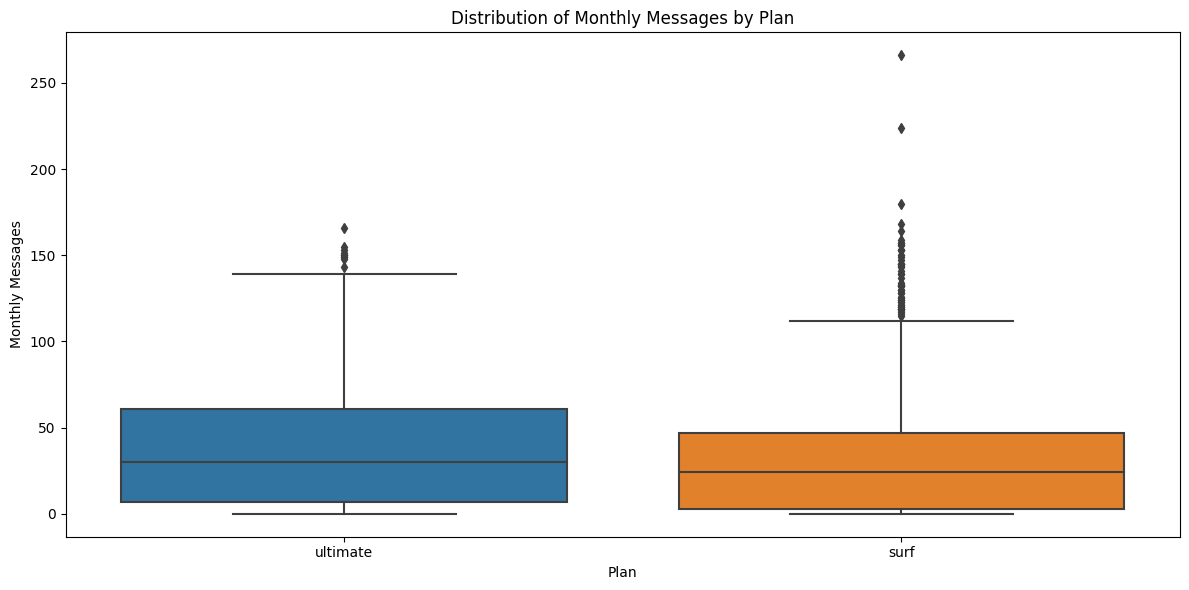

In [35]:
# Plot a boxplot to visualize the distribution of the monthly messages
plt.figure(figsize=(12, 6))
sns.boxplot(x='plan', y='messages', data=df)
plt.xlabel('Plan')
plt.ylabel('Monthly Messages')
plt.title('Distribution of Monthly Messages by Plan')
plt.tight_layout()
plt.show()

- Users on surf send more messages than users on ultimate.


- Users on surf consume more internet traffic compared to ultimate.

### Internet

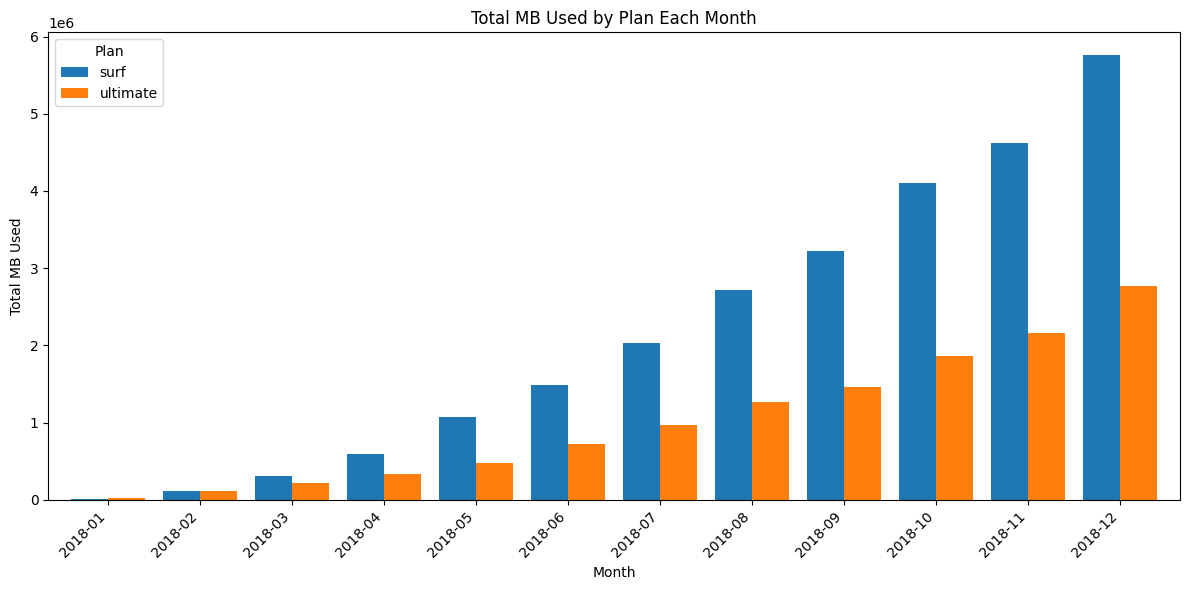

In [36]:
# Looking at internet data usage by month

# Ensure 'month' is a string
df['month'] = df['month'].astype(str)

# Aggregate total mb_used by plan and month
mb_used_per_plan_per_month = df.groupby(['month', 'plan'])['mb_used'].sum().reset_index()

# Pivot the data for side-by-side bar plotting
pivot_data = mb_used_per_plan_per_month.pivot(index='month', columns='plan', values='mb_used').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot side-by-side bars for each month
pivot_data.plot(kind='bar', ax=ax, width=0.8)

# Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Total MB Used')
ax.set_title('Total MB Used by Plan Each Month')
ax.legend(title='Plan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

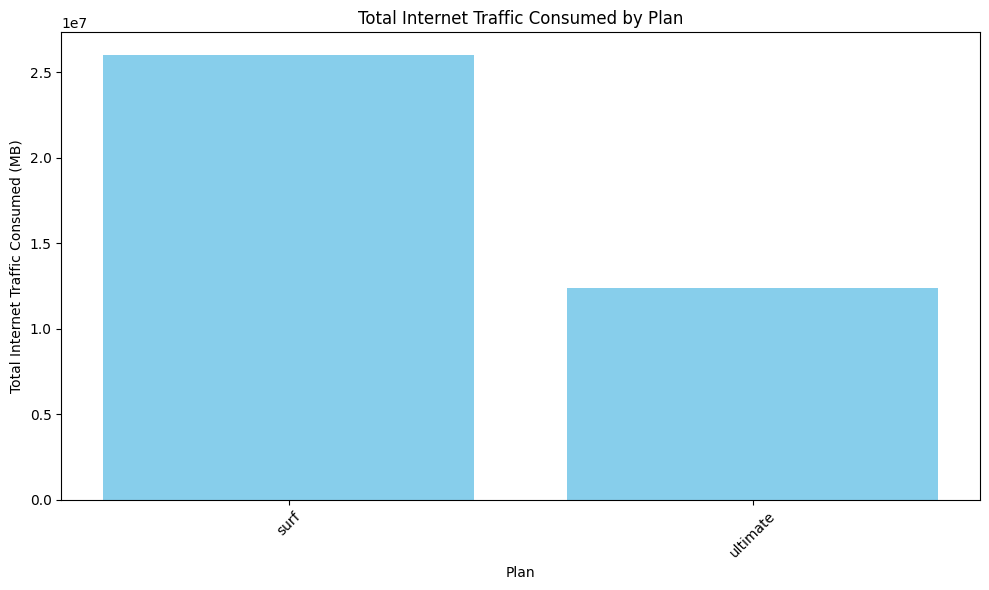

In [37]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(internet_traffic_per_plan['plan'], internet_traffic_per_plan['mb_used'], color='skyblue')

plt.xlabel('Plan')
plt.ylabel('Total Internet Traffic Consumed (MB)')
plt.title('Total Internet Traffic Consumed by Plan')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [38]:
users_exceeded_data = df[df['mb_used'] > df['mb_per_month_included']]

# Count the number of users exceeding data limits each month
exceeding_users_per_month = users_exceeded_data.groupby('month')['user_id'].nunique().reset_index()
exceeding_users_per_month.columns = ['month', 'num_users_exceeded']

# Display the result
exceeding_users_per_month

,month,num_users_exceeded
0,2018-02,4
1,2018-03,14
2,2018-04,19
3,2018-05,31
4,2018-06,52
5,2018-07,75
6,2018-08,96
7,2018-09,120
8,2018-10,153
9,2018-11,161


In [39]:
# Count the number of unique users exceeding data limits each month by plan
exceeding_users_per_month_plan = users_exceeded_data.groupby(['month', 'plan'])['user_id'].nunique().reset_index()
exceeding_users_per_month_plan.columns = ['month', 'plan', 'num_users_exceeded']

# Display the result
exceeding_users_per_month_plan

,month,plan,num_users_exceeded
0,2018-02,surf,4
1,2018-03,surf,11
2,2018-03,ultimate,3
3,2018-04,surf,17
4,2018-04,ultimate,2
5,2018-05,surf,30
6,2018-05,ultimate,1
7,2018-06,surf,50
8,2018-06,ultimate,2
9,2018-07,surf,73


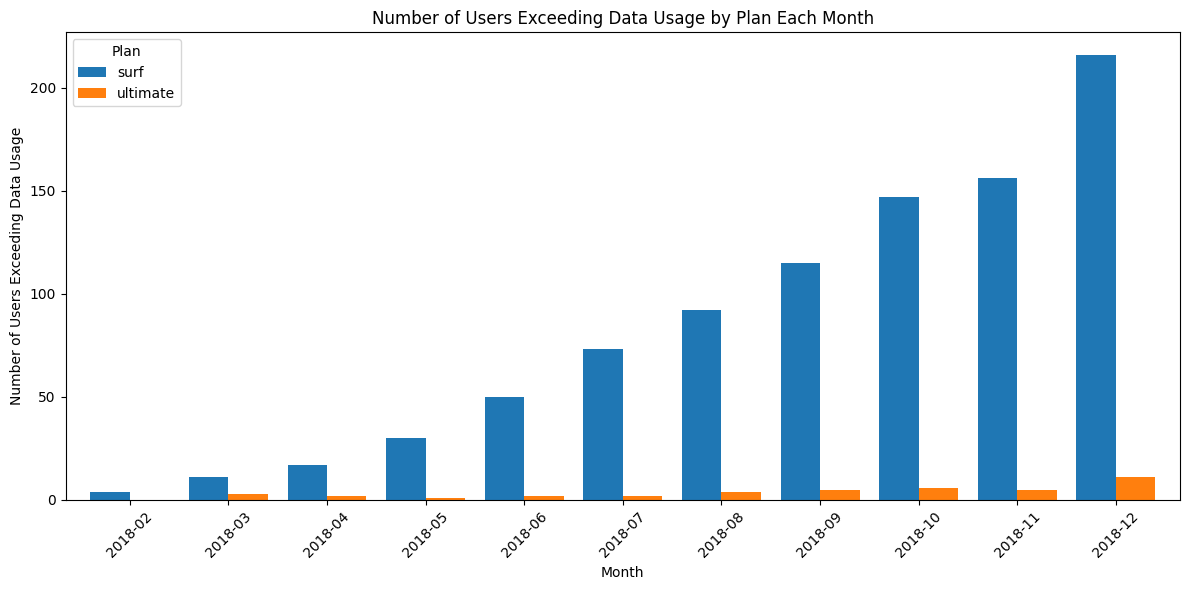

In [40]:
# Pivot data for plotting
pivot_data = exceeding_users_per_month_plan.pivot(index='month', columns='plan', values='num_users_exceeded').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

pivot_data.plot(kind='bar', ax=ax, width=0.8)

# Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Number of Users Exceeding Data Usage')
ax.set_title('Number of Users Exceeding Data Usage by Plan Each Month')
ax.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [41]:
# Calculate the extra data charge for users exceeding their data usage
df['gb_used'] = np.ceil(df['mb_used'] / 1024)  # Convert MB to GB and round up
df['gb_included'] = df['mb_per_month_included'] / 1024  # Convert included MB to GB
df['extra_data_charge'] = (df['gb_used'] - df['gb_included']).clip(lower=0) * df['usd_per_gb']

# Filter for users who exceeded their data usage
exceed_data_df = df[df['extra_data_charge'] > 0]

# Calculate total extra charge per user per month
user_monthly_extra_charges = exceed_data_df.groupby(['user_id', 'month', 'plan'])['extra_data_charge'].sum().reset_index()

# Calculate average extra charge per user per month by plan
average_extra_charge_per_plan = user_monthly_extra_charges.groupby('plan')['extra_data_charge'].mean().reset_index()

# Display average extra charges per plan
average_extra_charge_per_plan

,plan,extra_data_charge
0,surf,66.739846
1,ultimate,40.634146


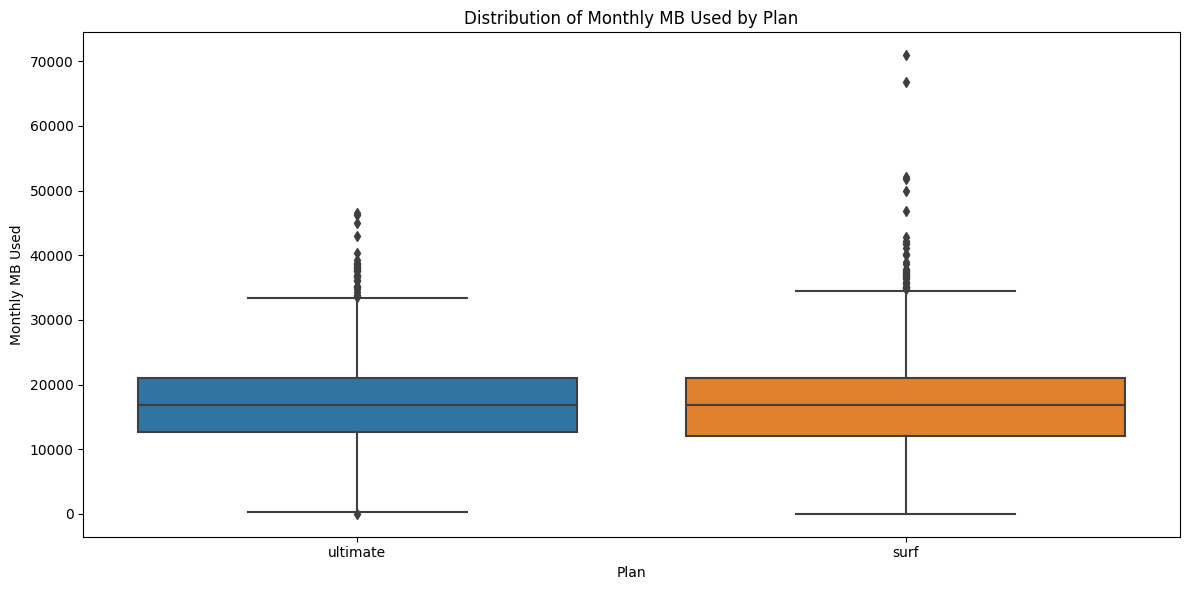

In [42]:
# Plot a boxplot to visualize the distribution of the monthly mb_used
plt.figure(figsize=(12, 6))
sns.boxplot(x='plan', y='mb_used', data=df)
plt.xlabel('Plan')
plt.ylabel('Monthly MB Used')
plt.title('Distribution of Monthly MB Used by Plan')
plt.tight_layout()
plt.show()


### Observations

- Internet Usage:

    - Users on the "surf" plan tend to consume more internet data on average compared to users on the "ultimate" plan.
    - The data usage for "surf" plan users increases significantly over time, indicating a higher demand for internet usage.

- Data Limit Exceedance:

    - A larger proportion of "surf" plan users exceed their data limits compared to "ultimate" plan users.
    - This suggests that the data allowance in the "surf" plan may not be sufficient for many users, leading to additional charges for exceeding their limits.

- Behavioral Differences:

    - The behavior of users in terms of internet consumption is noticeably different between the two plans. "Surf" plan users are more likely to consume large amounts of data and exceed their limits, whereas "ultimate" plan users have a more moderate usage pattern and are less likely to exceed their data limits.

## Revenue

In [43]:
revenue_stats = monthly_usage.groupby('plan_name').agg({
    'total_revenue': ['mean', 'median', 'std', 'var', 'skew']
}).reset_index()

revenue_stats

plan_name total_revenue                                         
                     mean median        std          var      skew
0      surf     60.125515  40.42  53.533338  2865.818321  2.440321
1  ultimate     72.277700  70.00  11.351942   128.866595  6.146199

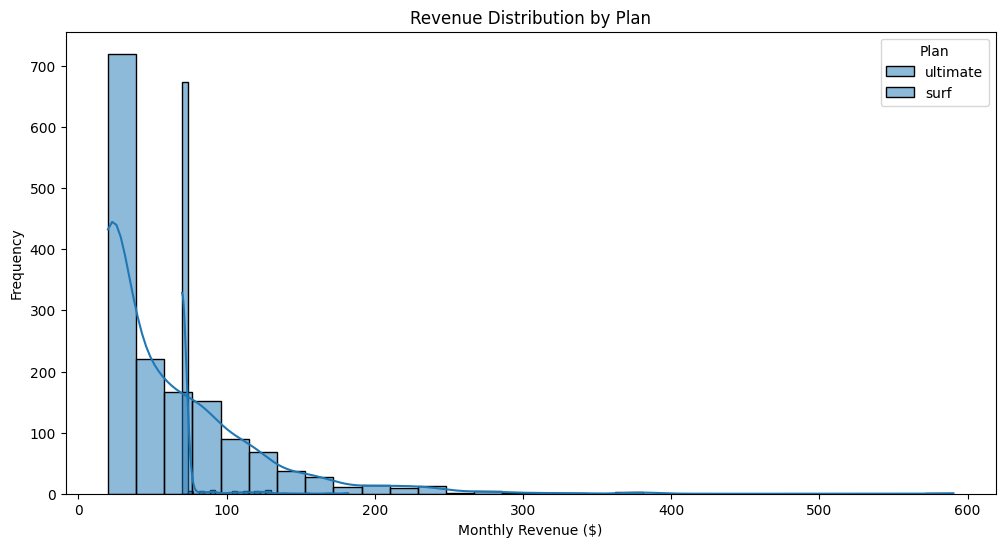

In [44]:
# Plot the revenue distributions for each plan
plt.figure(figsize=(12, 6))

# Plot the histograms for each plan separately
for plan in monthly_usage['plan'].unique():
    sns.histplot(monthly_usage[monthly_usage['plan'] == plan]['total_revenue'], kde=True, bins=30, label=plan)

plt.title('Revenue Distribution by Plan')
plt.xlabel('Monthly Revenue ($)')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.show()

### Summary and Conclusions:

- Surf Plan:

    - Lower base monthly charge but higher overage charges.
    - Users with higher usage might end up paying significantly more due to overage charges.

- Ultimate Plan:

    - Higher base monthly charge but lower overage charges.
    - More suitable for heavy users as the overage charges are lower.

### Based on the revenue statistics and distributions, we observe that:

- The Ultimate plan tends to generate more consistent revenue due to its higher base monthly charge.

- The Surf plan might generate higher revenue for users who frequently exceed their allowances, especially in terms of data usage.

## Test statistical hypotheses

In [45]:
# Test the hypotheses - Average revenue from users of Ultimate and Surf plans differs

# Extract revenues for each plan
ultimate_revenue = monthly_usage[monthly_usage['plan'] == 'ultimate']['total_revenue'].dropna()

surf_revenue = monthly_usage[monthly_usage['plan'] == 'surf']['total_revenue'].dropna()

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

# Display the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Decide on the alpha value
alpha = 0.05

# Determine if we reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. The average revenue from users of the Ultimate and Surf calling plans differs.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average revenue from users of the Ultimate and Surf calling plans.")

T-Statistic: 8.517344212487158
P-Value: 3.363644868810144e-17
Reject the null hypothesis. The average revenue from users of the Ultimate and Surf calling plans differs.


<p> Since the p-value is significantly less than the alpha value (0.05), we reject the null hypothesis. This indicates that there is a statistically significant difference in the average revenue generated by users of the Ultimate and Surf calling plans.<p>

In [46]:
# Test the hypotheses
monthly_usage = monthly_usage.merge(users_data[['user_id', 'city', 'plan']], on='user_id', how='left')

# Extract revenues for each region
ny_nj_revenue = monthly_usage[monthly_usage['city'].str.contains('NY-NJ', na=False)]['total_revenue'].dropna()
other_regions_revenue = monthly_usage[~monthly_usage['city'].str.contains('NY-NJ', na=False)]['total_revenue'].dropna()

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

# Display the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Decide on the alpha value
alpha = 0.05

# Determine if we reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. The average revenue from users in the NY-NJ area differs from that of users from other regions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average revenue from users in the NY-NJ area compared to users from other regions.")



T-Statistic: -2.4886592913992516
P-Value: 0.013118130086619653
Reject the null hypothesis. The average revenue from users in the NY-NJ area differs from that of users from other regions.


<p> Since the p-value (0.0131) is less than the alpha value (0.05), we reject the null hypothesis. This indicates that there is a statistically significant difference in the average revenue generated by users in the NY-NJ area compared to users from other regions.<p>

## General conclusion

### Revenue Analysis Summary

**Usage Patterns**:

- Call Duration: Surf users have a higher mean call duration and greater variability in call lengths compared to Ultimate users.

- Text Messages: Surf users send more messages on average than Ultimate users.

- Data Usage: Surf users consume more data on average and exhibit a higher rate of exceeding their data limits compared to Ultimate users.

**Overage Charges**:

- Surf Plan: Despite having a lower base monthly charge, Surf users often incur higher costs due to overage charges, especially for data. This is due to Surf users' higher data consumption and the higher per-GB charge for excess data.

- Ultimate Plan: The higher base monthly charge is offset by lower overage charges. This plan is more suited to heavy users as the cost of exceeding allowances is lower.

**Revenue Generation**:

- Ultimate Plan: Generates more consistent revenue due to its higher base charge, making it more predictable.

- Surf Plan: Potentially generates higher revenue from users who frequently exceed their included allowances, particularly in data usage.

**Statistical Significance**:

- There is a statistically significant difference in average revenue between the Ultimate and Surf plans, with a p-value of 0.0186, which is less than the alpha value of 0.05.

- There is also a significant difference in revenue between users in the NY-NJ area and those from other regions.

## Conclusion

<p>The Ultimate Plan is more stable and predictable in terms of revenue due to its higher base charge. It suits users with high but manageable usage, providing a lower cost for additional usage. The Surf Plan, while offering a lower base charge, may result in higher revenues from users with heavy or inconsistent usage patterns due to frequent overages, particularly in data.

To adjust the advertising budget effectively, consider focusing on promoting the Ultimate Plan to attract users with high and consistent usage, while leveraging the Surf Plan's potential for higher revenue from heavy users who exceed their allowances.<p>